In [42]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import graphviz
import warnings
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",90) #設定pandas最多顯示出50個欄位資訊

train = pd.read_csv("train.csv", encoding = 'big5')
train.replace(['NaN','NULL'],0)
train['time_code']=train['Dates'].str.split(":").str.get(0).str.title()
train = train.drop(columns=['Dates'])
train

,Category,DayOfWeek,PdDistrict,X,Y,time_code
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,23
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,23
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,23
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,23
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,23
...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,-122.459033,37.714056,0
878045,LARCENY/THEFT,Monday,INGLESIDE,-122.447363,37.731948,0
878046,LARCENY/THEFT,Monday,SOUTHERN,-122.403390,37.780266,0
878047,VANDALISM,Monday,SOUTHERN,-122.390531,37.780607,0


In [43]:
df_DayOfWeek = pd.get_dummies(train['DayOfWeek'])
df_PdDistrict  = pd.get_dummies(train['PdDistrict'])
df_time_code  = pd.get_dummies(train['time_code'])
train2 =  pd.merge(train,df_DayOfWeek,left_index=True,right_index=True)
train3 =  pd.merge(train2,df_PdDistrict,left_index=True,right_index=True)
train4 = pd.merge(train3,df_time_code,left_index=True,right_index=True)
train4['North']= 0
train4.loc[train4.Y> 37.77102029807624,['North']] = 1
train4['South']= 0
train4.loc[train4.Y<= 37.77102029807624,['South']] = 1
train4['East']=0
train4.loc[train4.X> -122.42261645600877,['East']] = 1
train4['West']=0
train4.loc[train4.X<= -122.42261645600877,['West']] = 1
train4

,Category,DayOfWeek,PdDistrict,X,Y,time_code,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,3,4,5,6,7,8,9,North,South,East,West
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,23,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,23,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,23,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,23,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,23,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,-122.459033,37.714056,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
878045,LARCENY/THEFT,Monday,INGLESIDE,-122.447363,37.731948,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
878046,LARCENY/THEFT,Monday,SOUTHERN,-122.403390,37.780266,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
878047,VANDALISM,Monday,SOUTHERN,-122.390531,37.780607,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [44]:
print(train4['X'].mean(),train4['Y'].mean())

-122.42261645600877 37.77102029807624


In [45]:
ax = train.groupby('Category')
ax.size()

Category
ARSON                            1513
ASSAULT                         76876
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36755
DISORDERLY CONDUCT               4320
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53971
DRUNKENNESS                      4280
EMBEZZLEMENT                     1166
EXTORTION                         256
FAMILY OFFENSES                   491
FORGERY/COUNTERFEITING          10609
FRAUD                           16679
GAMBLING                          146
KIDNAPPING                       2341
LARCENY/THEFT                  174900
LIQUOR LAWS                      1903
LOITERING                        1225
MISSING PERSON                  25989
NON-CRIMINAL                    92304
OTHER OFFENSES                 126182
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7484
RECOVERED VEHICLE                3138
ROBBERY                         23000
RUN

In [60]:
X = train4[['North','South','East','West','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday','BAYVIEW','CENTRAL','INGLESIDE','MISSION','NORTHERN','PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN',
            '0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']]
y = train4['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test, tree.predict(X_test)))
#print(metrics.confusion_matrix(y_test,tree.predict(X_test),labels=['ARSON','DRUG/NARCOTIC', 'LARCENY/THEFT', 'OTHER OFFENSES','ASSAULT']))

C:\Users\HuanJian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       346
                    ASSAULT       0.19      0.00      0.01     19084
                 BAD CHECKS       0.00      0.00      0.00        96
                    BRIBERY       0.00      0.00      0.00        74
                   BURGLARY       0.00      0.00      0.00      9332
         DISORDERLY CONDUCT       0.14      0.01      0.02      1077
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       570
              DRUG/NARCOTIC       0.22      0.32      0.26     13453
                DRUNKENNESS       0.00      0.00      0.00      1120
               EMBEZZLEMENT       0.00      0.00      0.00       249
                  EXTORTION       0.00      0.00      0.00        50
            FAMILY OFFENSES       0.00      0.00      0.00       106
     FORGERY/COUNTERFEITING       0.00      0.00      0.00      2603
                      FRAUD      

In [66]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", feature_names=['North','South','East','West','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday','BAYVIEW','CENTRAL','INGLESIDE','MISSION','NORTHERN','PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN',
            '0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9'],
                class_names=['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT','EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON', 'NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE','SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS'],filled=True, rounded=True,special_characters=True)

In [67]:
# 若無法正常顯示中文，可利用以下函式修改.dot裡的字體設定
def tree_set_font(filename, fontname):
    with open("tree.dot", encoding='utf-8') as fin, open('tree2.dot','w', encoding='utf-8') as fout:
        for line in fin:
            if 'node [shape=box]' in line:
                fout.write('node [shape=box,fontname="'+fontname+'"];\n')
            else:
                fout.write(line)

# 修改字體為 DFKai-SB
tree_set_font('tree.dot','DFKai-SB')
# 輸出為 .png
!dot -Tpng tree2.dot -o tree2.png

In [57]:
!dot -Tpng tree.dot-o tree.png

Error: dot: can't open tree.dot-o
Error: dot: can't open tree.png


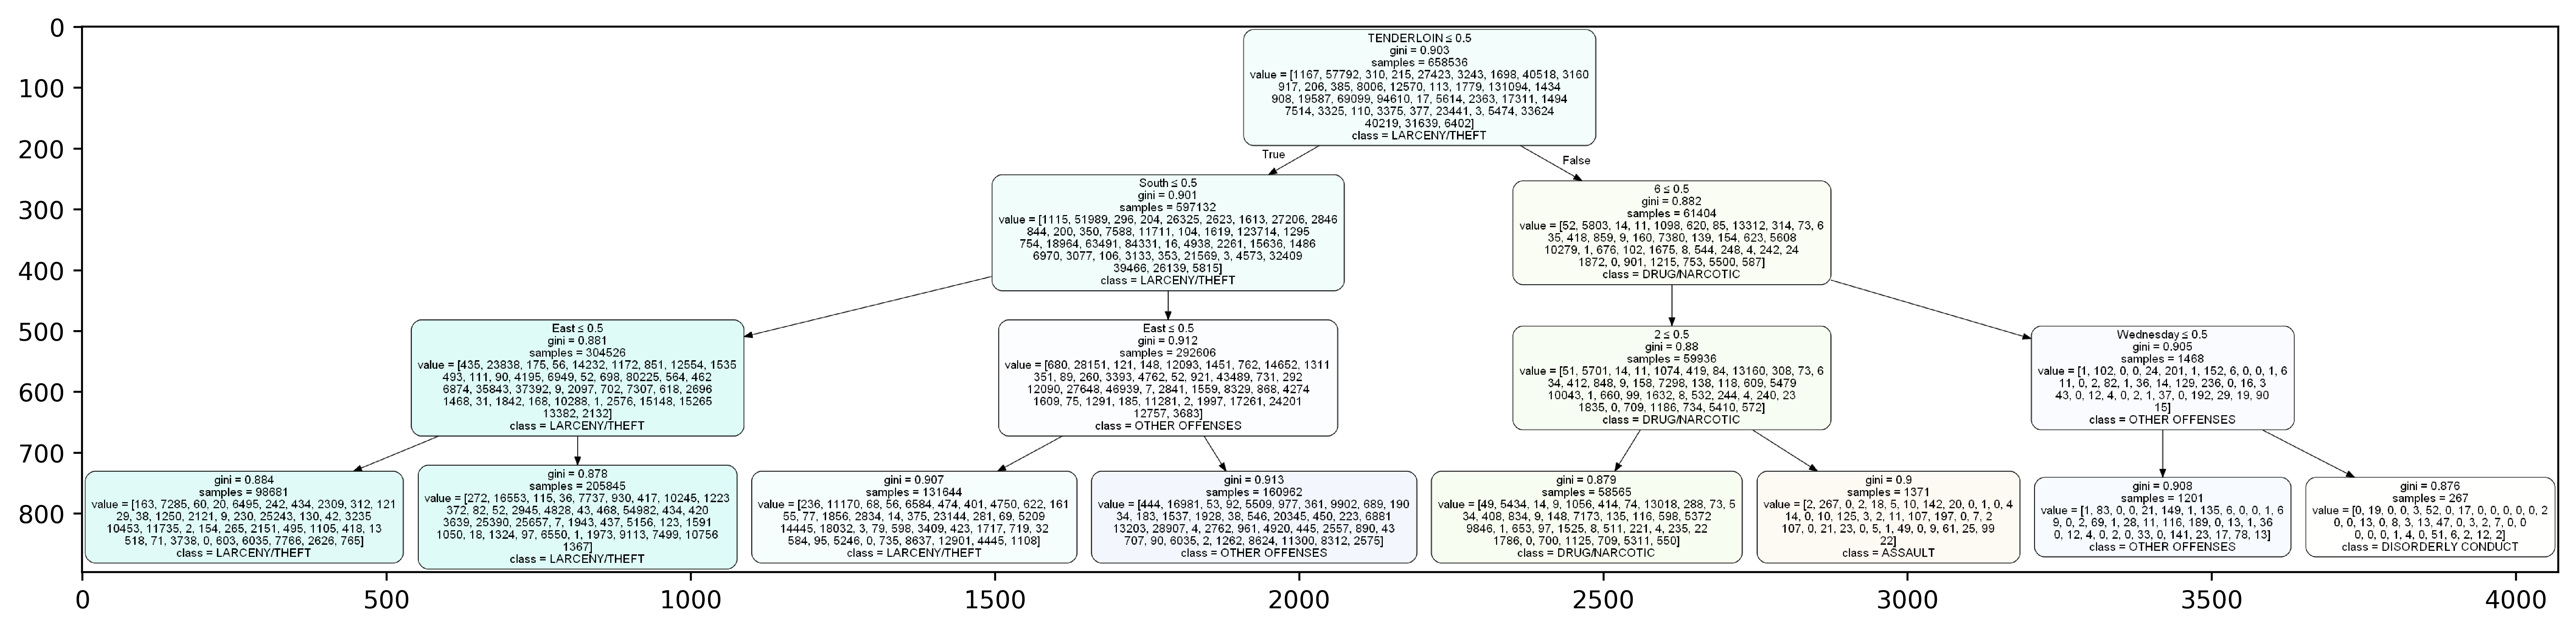

In [68]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree2.png')
fig = plt.figure(figsize=(18,20), dpi=500) #dpi:調整解析度
plt.imshow(img)

In [18]:
tree.feature_importances_.tolist()

df = pd.DataFrame({'feature':['North','South','East','West','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday','BAYVIEW','CENTRAL','INGLESIDE','MISSION','NORTHERN','PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN',
            '0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,North,0.420184
1,TENDERLOIN,0.408264
2,East,0.152057
3,6,0.012494
4,5,0.006600
5,Sunday,0.000401
6,2,0.000000
7,13,0.000000
8,14,0.000000
9,15,0.000000
